### Задание

Создайте нейронную сеть, распознающую рукописные цифры. Используя подготовленную базу и шаблон ноутбука, нормируйте данные, создайте и обучите сверточную сеть.

**Параметры модели:** сеть должна содержать минимум 2 сверточных слоя; полносвязные слои; слои подвыборки, нормализации, регуляризации по 1 шт.

**Гиперпараметры обучения:** функция ошибки - категориальная кроссэнтропия, оптимизатор - Adam с шагом обучения одна тысячная, размер батча - 128, количество эпох 15, детали обучения - отображать.

**В конце** выведите график обучения: доли верных ответов на обучающей и проверочной выборках.


In [1]:
# загрузка датасета MNIST

from tensorflow.keras.datasets import mnist 
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

11490434/11490434 [==============================] - 1s 0us/step


In [2]:
x_train.shape

(60000, 28, 28)

In [2]:
# Подключение утилит для to_categorical
from tensorflow.keras import utils 

# Подключение библиотеки для работы с массивами
import numpy as np 

# Подключение библиотек для отрисовки изображений
import matplotlib.pyplot as plt 

# Подключение библиотеки для генерации случайных чисел
import random

# Подключение класса для работы с изображением
from PIL import Image

# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline 

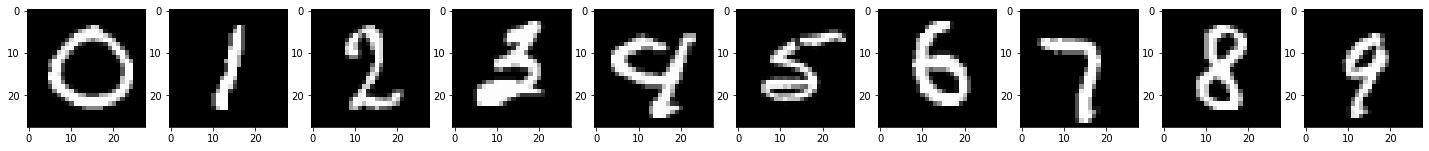

In [3]:
# вывод изображений каждого класса для ознакомления с датасетом

fig, axs = plt.subplots(1, 10, figsize=(25,3)) # создаем полотно для 10 графиков с размером 25 на 3
for i in range(10):
  label_indexes = np.where(y_train == i)[0] # получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # выбирает случайный индекс из списка созданного выше
  img = x_train[index] # выбираем из x_train нужное положение
  axs[i].imshow(Image.fromarray(img), cmap='gray') # выводим изображение

plt.show()  

In [4]:
# добавляем размерность массиву mnist, чтобы сеть поняла что это чб
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# преобразуем выборки с ответами в OHE
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

# посмотрим форматы выборок перед обучением
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print()
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)

y_train: (60000, 10)
y_test: (10000, 10)


In [ ]:
# Ваше решение

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, BatchNormalization, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam

x_train = x_train.astype('float')/255
x_test = x_test.astype('float')/255

model = Sequential()
model.add(Conv2D(256,(3,3), padding='same', activation='relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = model.fit(x_train,y_train, validation_split=0.2, shuffle=True, batch_size=128, epochs=15, verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 256)       2560      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 256)      1024      
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 256)       590080    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 256)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 9, 512)         1180160   
                                                                 
 dropout_1 (Dropout)         (None, 9, 9, 512)        

In [23]:
evalHist = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 3s 8ms/step - loss: 0.0513 - accuracy: 0.9915


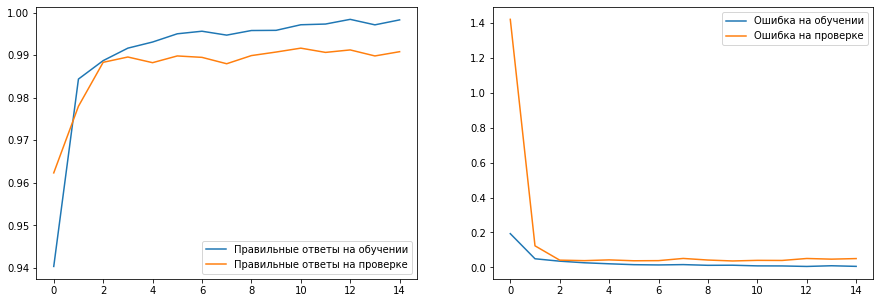

In [26]:
plt.figure(1, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'], label='Правильные ответы на обучении')
plt.plot(hist.history['val_accuracy'], label='Правильные ответы на проверке')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['loss'], label='Ошибка на обучении')
plt.plot(hist.history['val_loss'], label='Ошибка на проверке')
plt.legend()
